In [1]:
#Data Visualization
import pandas as pd

#load data
resume = pd.read_csv("/content/UpdatedResumeDataSet.csv")

#view all of the categories
len(resume.iloc[:, 0].unique())
#25 categories
resume.iloc[:, 0].unique()
#note that all of the categories are good, there doesnt need for there to be any
#more data marshalling for the categories
#this is why I choose this data set


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [2]:
#view head
resume.head()
#note all the crappy characters in the resume to be cleaned

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


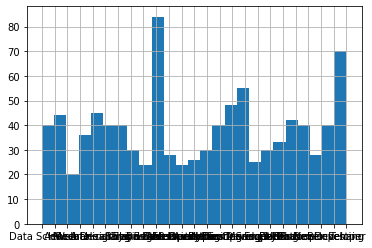

In [3]:
#view 
resume.Category.hist(bins=25)
#looks like a pretty even distribution of categories, the minimum number of resumes for 1 particular categories is 20

In [4]:
#find number of resumes for training versus validation set
len(resume)
#962 resumes

962*.2
#193 resumes for 20% validation
962-193
#769 entries for training

769

In [5]:
#label encoding categories
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
resume["Category"] = resume["Category"].astype('category')
resume.dtypes
d = dict(enumerate(resume.Category))
print (d)

{0: 'Data Science', 1: 'Data Science', 2: 'Data Science', 3: 'Data Science', 4: 'Data Science', 5: 'Data Science', 6: 'Data Science', 7: 'Data Science', 8: 'Data Science', 9: 'Data Science', 10: 'Data Science', 11: 'Data Science', 12: 'Data Science', 13: 'Data Science', 14: 'Data Science', 15: 'Data Science', 16: 'Data Science', 17: 'Data Science', 18: 'Data Science', 19: 'Data Science', 20: 'Data Science', 21: 'Data Science', 22: 'Data Science', 23: 'Data Science', 24: 'Data Science', 25: 'Data Science', 26: 'Data Science', 27: 'Data Science', 28: 'Data Science', 29: 'Data Science', 30: 'Data Science', 31: 'Data Science', 32: 'Data Science', 33: 'Data Science', 34: 'Data Science', 35: 'Data Science', 36: 'Data Science', 37: 'Data Science', 38: 'Data Science', 39: 'Data Science', 40: 'HR', 41: 'HR', 42: 'HR', 43: 'HR', 44: 'HR', 45: 'HR', 46: 'HR', 47: 'HR', 48: 'HR', 49: 'HR', 50: 'HR', 51: 'HR', 52: 'HR', 53: 'HR', 54: 'HR', 55: 'HR', 56: 'HR', 57: 'HR', 58: 'HR', 59: 'HR', 60: 'HR',

In [6]:
resume["Category"] = resume["Category"].cat.codes
resume.head()

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
resume.iloc[:, 0].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int8)

In [8]:
d = dict(enumerate(resume.Category))
print (d)

{0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6, 13: 6, 14: 6, 15: 6, 16: 6, 17: 6, 18: 6, 19: 6, 20: 6, 21: 6, 22: 6, 23: 6, 24: 6, 25: 6, 26: 6, 27: 6, 28: 6, 29: 6, 30: 6, 31: 6, 32: 6, 33: 6, 34: 6, 35: 6, 36: 6, 37: 6, 38: 6, 39: 6, 40: 12, 41: 12, 42: 12, 43: 12, 44: 12, 45: 12, 46: 12, 47: 12, 48: 12, 49: 12, 50: 12, 51: 12, 52: 12, 53: 12, 54: 12, 55: 12, 56: 12, 57: 12, 58: 12, 59: 12, 60: 12, 61: 12, 62: 12, 63: 12, 64: 12, 65: 12, 66: 12, 67: 12, 68: 12, 69: 12, 70: 12, 71: 12, 72: 12, 73: 12, 74: 12, 75: 12, 76: 12, 77: 12, 78: 12, 79: 12, 80: 12, 81: 12, 82: 12, 83: 12, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 1